In [1]:
import importlib
import modules
from collections import Counter
import numpy as np

importlib.reload(modules)

from modules import CA
import matplotlib.pyplot as plt
import cellpylib as cpl
from modules import triangulize_evolution
from modules import find_elem_jams
import scipy


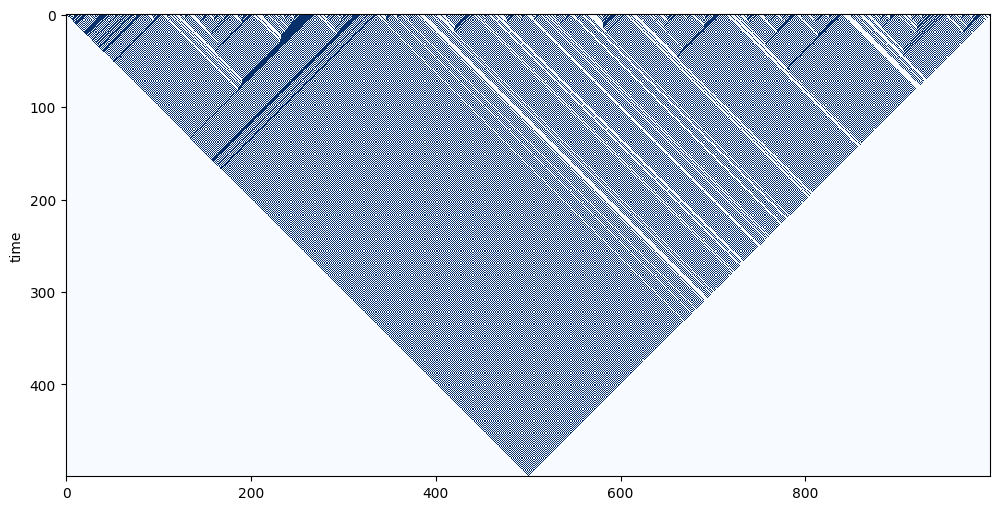

In [2]:
ca_184 = CA()

p = 0.5
L = 1000
T = int(L / 2)
initial_state = ca_184.gen_initial_state_bernoulli(L, p)

cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton_triangle = triangulize_evolution(cellular_automaton)

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton_triangle, colormap='Blues')




In [6]:
def calculate_jam_size(cellular_automaton_triangle):
    jam_size = {}
    automaton_shape = cellular_automaton_triangle.shape
    
    for row in range(automaton_shape[0]-1):  
        for column in range(automaton_shape[1]):
            state = cellular_automaton_triangle[row, column]
            new_state = cellular_automaton_triangle[row+1, column]

            original_jam_column = column + row

            if state == 1 and new_state == 1:
                if original_jam_column not in jam_size:
                    jam_size[original_jam_column] = 1
                else:
                    jam_size[original_jam_column] += 1

    return jam_size

def remove_short_jams(jam_sizes):
    jam_sizes_copy = jam_sizes.copy()
    previous_jam_size = 0
    removed_jams = []
    for key in jam_sizes_copy.keys():
        if jam_sizes_copy[key] <= previous_jam_size:
            removed_jams.append(key)
        else:
            previous_jam_size = jam_sizes_copy[key]

    for jam in removed_jams:
        jam_sizes_copy.pop(jam)

    return jam_sizes_copy, removed_jams

def merge_jams(jam_sizes):
    lists = sorted(jam_sizes.items()) # sorted by key, return a list of tuples

    jam, size = zip(*lists) # unpack a list of pairs into two tuples
    jam = np.array(jam)
    size = np.array(size)
    for index in range(len(jam)-1):
        if jam[index+1] == jam[index] + 1:
            size[index+1] += size[index]
            size[index] = 0
            
    sizes = [i for i in size if i != 0]


    return sizes

def run_simulation(N):
    final_jams_list = []
    for _ in range(N):
        ca_184 = CA()

        initial_state = ca_184.gen_initial_state_bernoulli(L, p)

        cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
        cellular_automaton_triangle = triangulize_evolution(cellular_automaton)

        
        jam_sizes = calculate_jam_size(cellular_automaton_triangle)
        jam_sizes_short, removed_jams = remove_short_jams(jam_sizes)
        final_jams = merge_jams(jam_sizes_short)
        final_jams_list.extend(final_jams)

    final_jams_counted = Counter(final_jams_list)

    return final_jams_counted

    

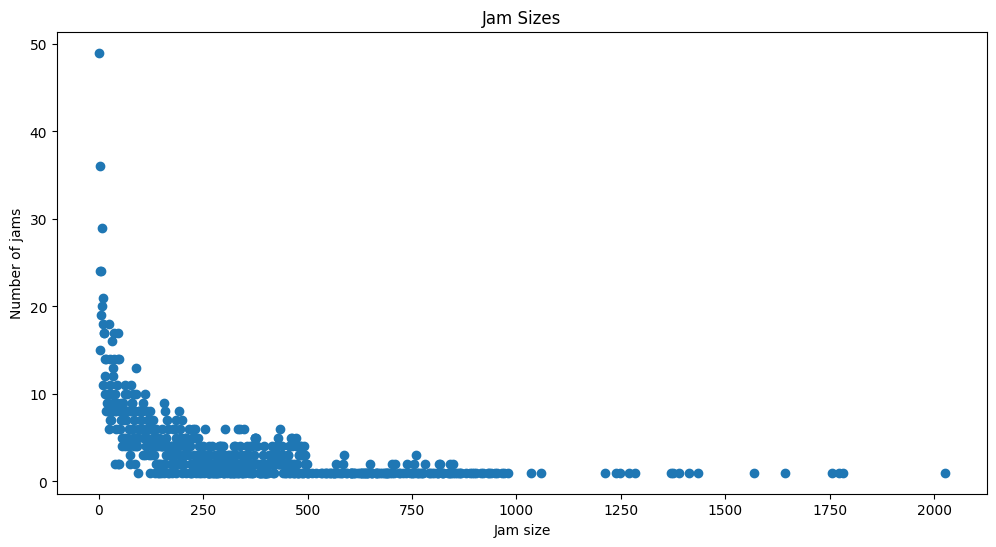

(1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 22

In [7]:
N=100
final_jams_counted = run_simulation(N)
lists = sorted(final_jams_counted.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.figure(figsize=(12,6))
plt.title(f'Jam Sizes')
plt.xlabel('Jam size')
plt.ylabel('Number of jams')
plt.plot(x, y, 'o')
plt.show()

print(x)
print(y)
print(f"Number of elementary jam size values: {len(final_jams_counted.keys())}")

53.69790678537981 0.5054165569775801


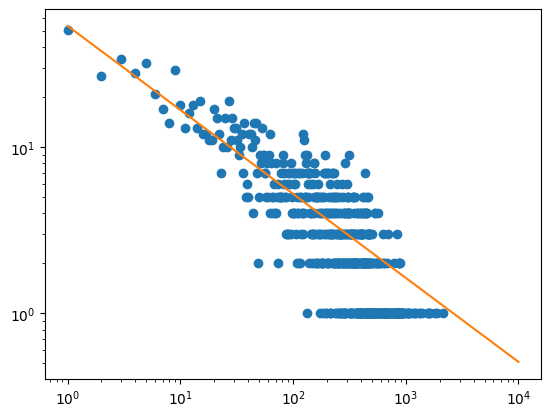

In [5]:
def func(x, a, b):
    return a * x ** -b

plt.plot(x,y,'o')

popt, pcov = scipy.optimize.curve_fit(func, x, y, p0=[1, 0.5])
a_optimal, b_optimal = popt

print(a_optimal, b_optimal)

x_fit=np.linspace(1,10**4,1000)
y_fit = []
for value in x_fit:
    y_fit.append(func(value, a_optimal, b_optimal))

plt.xscale('log')
plt.yscale('log')
plt.plot(x_fit,y_fit)

Jenna's jam sizes: [1, 2, 10]
My jam sizes: [3, 4, 14]


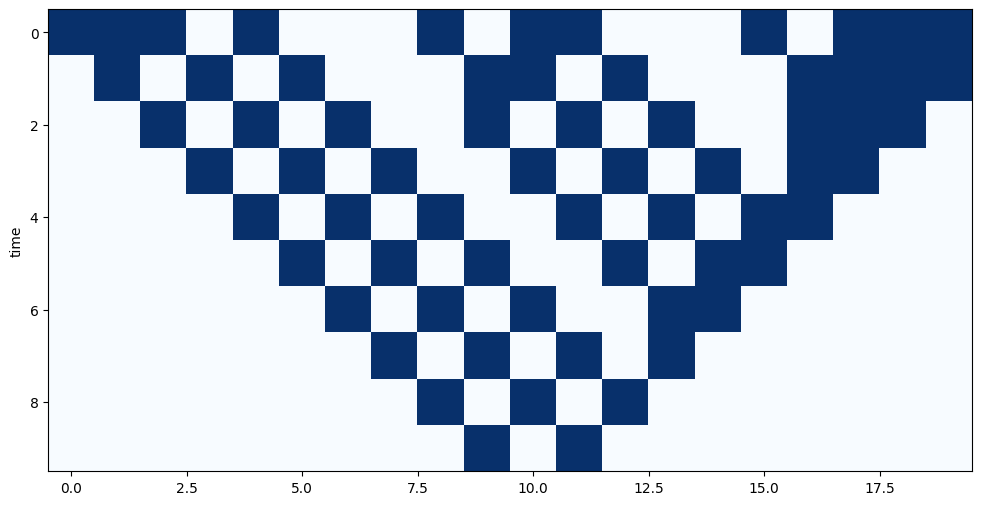

In [18]:
from collections import Counter
importlib.reload(modules)
from modules import find_elem_jams

p = 0.5
L = 20
T = int(L / 2)
initial_state = ca_184.gen_initial_state_bernoulli(L, p)
cellular_automaton = cpl.evolve(initial_state, timesteps=T, memoize=True, apply_rule=lambda n, c, t: cpl.nks_rule(n, rule=184))
cellular_automaton = triangulize_evolution(cellular_automaton)

jams = find_elem_jams(cellular_automaton)
jam_sizes = [jam[1] for jam in jams]

jennas_jam_sizes = calculate_jam_size(cellular_automaton)
jennas_jam_sizes_short, removed_jams = remove_short_jams(jennas_jam_sizes)
jennas_final_jams = merge_jams(jennas_jam_sizes_short)

print(f"Jenna's jam sizes: {jennas_final_jams}")
print(f"My jam sizes: {jam_sizes}")

fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the size as needed
cpl.plot(cellular_automaton, colormap='Blues')